In [2]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

: 

In [ ]:
import matplotlib.pyplot as plt
from datetime import datetime
import yfinance as yf
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")

In [ ]:
tech_list = ['HDB']   #, 'RELIANCE.NS', 'TCS.NS', 'SBIN.NS']
end = datetime.now()
start = "2006-12-29"
for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)

stk_list = [HDB]
com_name = ["HDFC"]

for comp, c_name in zip(stk_list, com_name):
    comp["company_name"] = c_name

df = pd.concat(stk_list, axis=0)

[*********************100%***********************]  1 of 1 completed


In [ ]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2006-12-29,7.650,7.656,7.511,7.548,6.753229,1686000,HDFC
2007-01-03,7.700,7.704,7.456,7.493,6.704021,2278000,HDFC
2007-01-04,7.490,7.534,7.389,7.479,6.691494,2269000,HDFC
2007-01-05,7.500,7.500,7.273,7.321,6.550131,1718000,HDFC
2007-01-08,7.272,7.353,7.203,7.260,6.495553,2070000,HDFC


In [ ]:
# Define your features (X) and the target variable (y)
X = df.drop(['Close', 'company_name'], axis=1)  # Exclude the target variable from the features
y = df['Close']                 # The target variable

In [ ]:
# Let's say we use 80% of the data for training and the rest for testing
train_size = int(len(X) * 0.95)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [ ]:
# Initialize the model
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_regressor.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [ ]:
# Make predictions
predictions = rf_regressor.predict(X_test)

# Calculate the performance metrics
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)

print(f"Root Mean Square Error: {rmse}")


Root Mean Square Error: 0.5228798920630974


In [ ]:
valid = {}
valid["actual"] = y_test
valid['Predictions'] = predictions
valid = pd.DataFrame(valid)

In [ ]:
valid

,actual,Predictions
Date,,
2023-01-30,66.000000,66.308599
2023-01-31,67.360001,67.363100
2023-02-01,64.680000,65.073549
2023-02-02,67.099998,67.218100
2023-02-03,67.480003,67.678200
...,...,...
2023-11-27,58.889999,59.476400
2023-11-28,59.349998,59.601900
2023-11-29,60.549999,60.753399


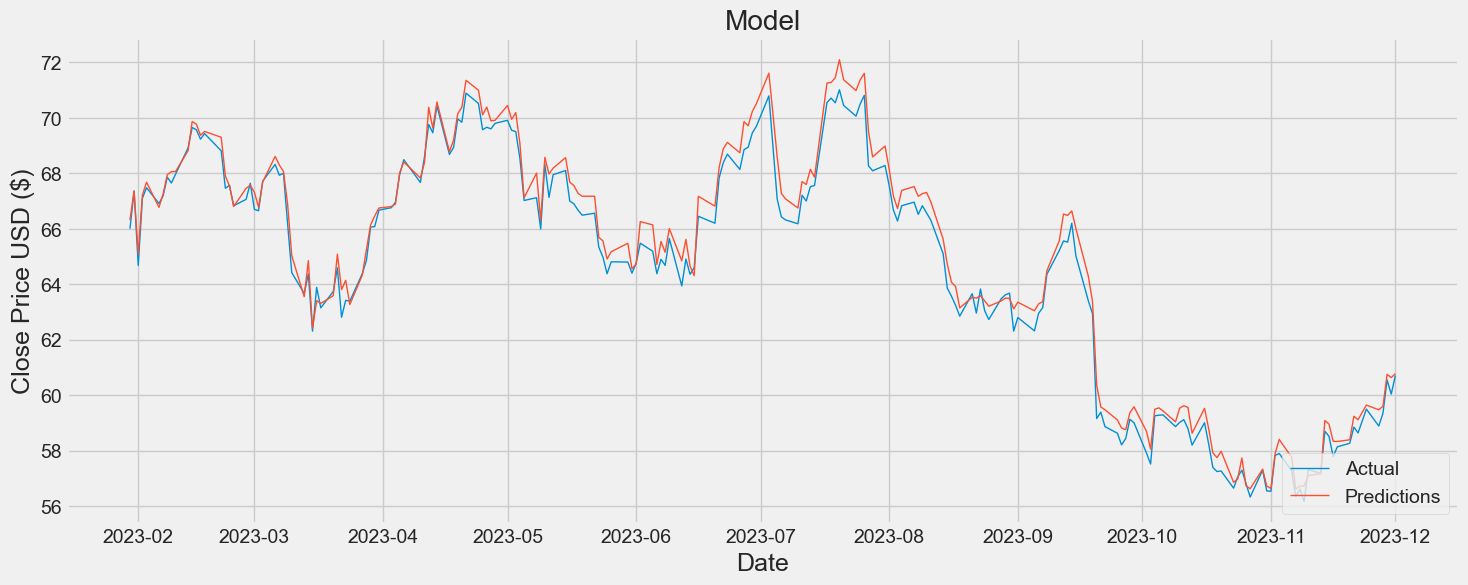

In [ ]:
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
#plt.plot(train['Close'], linewidth="1")
plt.plot(valid[['actual', 'Predictions']], linewidth="1")
plt.legend(['Actual','Predictions'], loc='lower right')
plt.show()

In [ ]:
valid

NameError: name 'valid' is not defined